# IMPORTS

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 10)

# READ THE DATA

In [3]:
data = pd.read_csv('./input/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.shape

(8807, 12)

# EDA BLOCK

In [5]:
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
                ... 
release_year       0
rating             4
duration           3
listed_in          0
description        0
Length: 12, dtype: int64

<AxesSubplot:ylabel='type'>

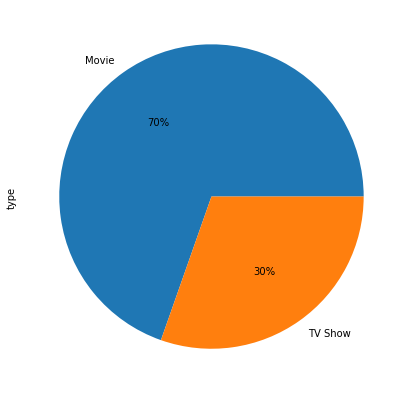

In [8]:
plt.figure(figsize=(7,7))
df['type'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [9]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [10]:
df['director'].nunique()

4528

In [11]:
df['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [12]:
df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [13]:
values = df['country'].value_counts()[:10].tolist()
labels = df['country'].value_counts()[:10].index.tolist()

In [14]:
print(labels, '\n', values)

['United States', 'India', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'Spain', 'France', 'Mexico', 'Egypt'] 
 [2818, 972, 419, 245, 199, 181, 145, 124, 110, 106]


# PLOTTING

Text(0.5, 1.0, 'TOP 10 Countries')

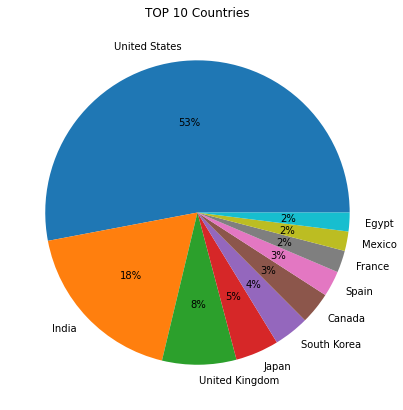

In [15]:
plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('TOP 10 Countries')

Text(0.5, 1.0, 'TOP 10 Countries with movies')

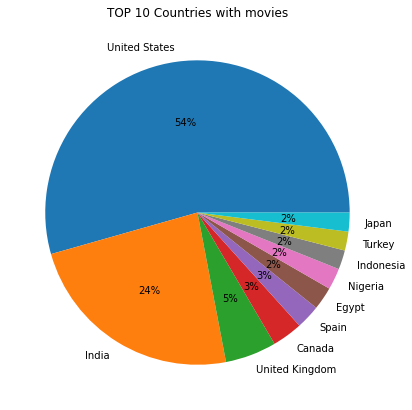

In [16]:
m = df[df['type'] == 'Movie']
m_values = m['country'].value_counts()[:10].tolist()
m_labels = m['country'].value_counts()[:10].index.tolist()

plt.figure(figsize=(7,7))
plt.pie(m_values, labels=m_labels, autopct='%1.0f%%')
plt.title('TOP 10 Countries with movies')

C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


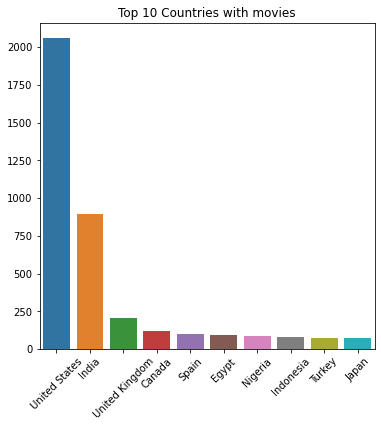

In [17]:
plt.figure(figsize=(6,6))
sns.barplot(m_labels, m_values)
plt.xticks(rotation=45)
plt.title('Top 10 Countries with movies')
plt.show()

In [18]:
df['rating'].value_counts()

TV-MA     3207
TV-14     2160
TV-PG      863
R          799
PG-13      490
          ... 
NC-17        3
UR           3
74 min       1
84 min       1
66 min       1
Name: rating, Length: 17, dtype: int64

In [19]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [20]:
date = pd.DataFrame(df['date_added'])
added = date['date_added'].str.split(', ', expand=True)
date['MD'] = added[0]
date['Year'] = added[1]
date.head()

,date_added,MD,Year
0,"September 25, 2021",September 25,2021
1,"September 24, 2021",September 24,2021
2,"September 24, 2021",September 24,2021
3,"September 24, 2021",September 24,2021
4,"September 24, 2021",September 24,2021


In [21]:
def get_month(row):
    mon = row['MD'].split(' ')
    if len(mon) == 2:
        return mon[0]
    else:
        return mon[1]

In [22]:
def get_day(row):
    mon = row['MD'].split(' ')
    if len(mon) == 2:
        return mon[1]
    else:
        return mon[2]

In [23]:
date['Month'] = date.apply(get_month, axis=1)
date['Day'] = date.apply(get_day, axis=1)

In [24]:
date = date.drop(['date_added', 'MD'], axis=1, errors='ignore')

In [25]:
date.head()

,Year,Month,Day
0,2021,September,25
1,2021,September,24
2,2021,September,24
3,2021,September,24
4,2021,September,24


In [26]:
df = pd.concat([df, date], axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,Month,Day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,24


C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


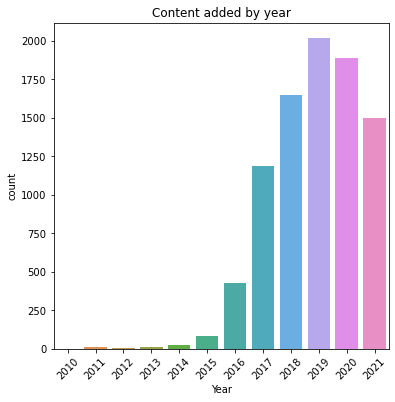

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(df['Year'], order=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
plt.xticks(rotation=45)
plt.title('Content added by year')
plt.show()

In [29]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['Month'] = df['Month'].map(d).astype('Int8')

In [30]:
import datetime

def get_weekdays(x):
    t = datetime.datetime(int(x['Year']), int(x['Month']), int(x['Day']))
    return t.weekday()

df['WeekDay'] = df.apply(get_weekdays, axis=1)

In [31]:
df['WeekDay'].value_counts()

4    2498
3    1396
2    1298
1    1197
0     851
5     816
6     751
Name: WeekDay, dtype: int64

In [32]:
df.isnull().sum()

show_id           0
type              0
title             0
director       2634
cast            825
               ... 
description       0
Year              0
Month             0
Day               0
WeekDay           0
Length: 16, dtype: int64

C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='count'>

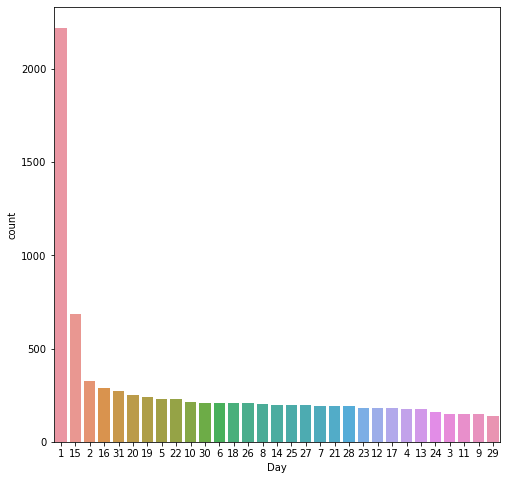

In [33]:
plt.figure(figsize=(8,8))
sns.countplot(df['Day'], order=df['Day'].value_counts().index)

C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WeekDay', ylabel='count'>

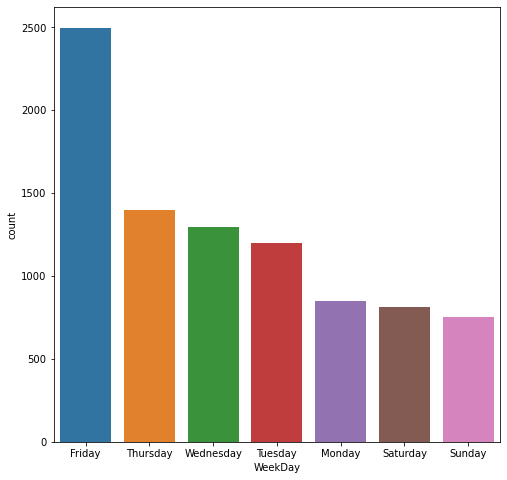

In [34]:
plt.figure(figsize=(8,8))
d = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
x = df['WeekDay'].map(d)
sns.countplot(x,order = x.value_counts().index)

In [35]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,Month,Day,WeekDay
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,5
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,4
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,4
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,4
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,4


In [36]:
df['description'][0]

'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

In [38]:
rec = df[['title', 'director', 'cast', 'listed_in', 'description']]
rec.head()

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,NaN,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [40]:
rec.isnull().sum()

title             0
director       2634
cast            825
listed_in         0
description       0
dtype: int64

In [41]:
rec['director'].replace(np.nan, 'unknown', inplace=True)
rec['cast'].replace(np.nan, 'unknown', inplace=True)

C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [42]:
rec['cast'] = rec['cast'].str.replace(', ', ' ')

C:\Users\GODOVO~1\AppData\Local\Temp/ipykernel_12504/1004193868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['cast'] = rec['cast'].str.replace(', ', ' ')


In [43]:
rec['listed_in'] = rec['listed_in'].str.replace(', ', ' ')

C:\Users\GODOVO~1\AppData\Local\Temp/ipykernel_12504/3395086435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['listed_in'] = rec['listed_in'].str.replace(', ', ' ')


In [44]:
rec_wo_des = rec.drop(['description'], axis=1)

In [45]:
rec['combined'] = rec['title'] + ' ' + rec['director'] + ' ' + rec['cast'] + ' ' + rec['listed_in'] + ' ' + rec['description']
rec_wo_des['combined'] = rec_wo_des['title'] + ' ' + rec_wo_des['director'] + ' ' + rec_wo_des['cast'] + ' ' + rec_wo_des['listed_in']

C:\Users\GODOVO~1\AppData\Local\Temp/ipykernel_12504/2715952809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['combined'] = rec['title'] + ' ' + rec['director'] + ' ' + rec['cast'] + ' ' + rec['listed_in'] + ' ' + rec['description']


In [46]:
rec.drop(['cast', 'director', 'listed_in', 'description'], axis=1, inplace=True, errors='ignore')

C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
rec.head()

,title,combined
0,Dick Johnson Is Dead,Dick Johnson Is Dead Kirsten Johnson unknown D...
1,Blood & Water,Blood & Water unknown Ama Qamata Khosi Ngema G...
2,Ganglands,Ganglands Julien Leclercq Sami Bouajila Tracy ...
3,Jailbirds New Orleans,Jailbirds New Orleans unknown unknown Docuseri...
4,Kota Factory,Kota Factory unknown Mayur More Jitendra Kumar...


In [48]:
rec['combined'][1]

'Blood & Water unknown Ama Qamata Khosi Ngema Gail Mabalane Thabang Molaba Dillon Windvogel Natasha Thahane Arno Greeff Xolile Tshabalala Getmore Sithole Cindy Mahlangu Ryle De Morny Greteli Fincham Sello Maake Ka-Ncube Odwa Gwanya Mekaila Mathys Sandi Schultz Duane Williams Shamilla Miller Patrick Mofokeng International TV Shows TV Dramas TV Mysteries After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'

# MODELING

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(rec['combined'].str.lower())
tfidf_matrix.shape

(8807, 52938)

In [51]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [52]:
print(rec.index)

RangeIndex(start=0, stop=8807, step=1)


In [53]:
indices = pd.Series(rec.index, index=rec['title']).drop_duplicates()

In [54]:
type(indices)

pandas.core.series.Series

In [55]:
def get_recommendations(title, cosine_sim=cosine_sim):
    try: 
        idx = indices[title]
    except:
        return None
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    
    match = [i[0] for i in sim_scores]
    score = [i[1] for i in sim_scores]
    
    dictionary = dict(zip(match, score))
    
    return dictionary

In [57]:
def recommend(title):
    result = get_recommendations(title)
    
    if result is None:
        print(f'{title} not found')
    else:
        print(f'Movie related to {title} are: ')
        for i in result:
            print(f"{rec['title'].iloc[i]} with score {result[i]*100:.2f} %")

In [60]:
recommend('Blood & Water')

Movie related to Blood & Water are: 
Diamond City with score 11.17 %
Kings of Jo'Burg with score 8.47 %
Shirkers with score 7.73 %
The Future of Water with score 7.42 %
Lady in the Water with score 7.04 %
Dive Club with score 6.38 %
Frank and Cindy with score 6.38 %
Get Even with score 6.28 %
Lion Pride with score 6.08 %
The Keepers with score 6.05 %
